In [2]:
import pandas as pd
import numpy as np
import io
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving global_warming_dataset.csv to global_warming_dataset.csv


In [3]:
gw_df = pd.read_csv(io.BytesIO(uploaded['global_warming_dataset.csv']))
print(gw_df.head())

# Data Cleaning: Drop duplicates and handle missing values
gw_df = gw_df.drop_duplicates().dropna()

       Country  Year  Temperature_Anomaly  CO2_Emissions    Population  \
0  Country_103  1913            -1.163537   8.876061e+08  1.627978e+08   
1  Country_180  1950            -0.432122   4.497517e+08  4.281359e+08   
2   Country_93  2014             0.444954   4.579080e+08  4.926732e+08   
3   Country_15  2020            -1.171616   5.049503e+08  1.252169e+09   
4  Country_107  1964            -0.564038   6.898891e+08  2.932960e+08   

   Forest_Area           GDP  Renewable_Energy_Usage  Methane_Emissions  \
0    54.872178  6.139887e+12               76.710013       8.317626e+06   
1    84.051006  2.601447e+12               68.450021       6.206540e+06   
2    72.295357  5.192677e+12               36.725699       1.056885e+06   
3    17.259684  8.252128e+12               77.547901       1.986813e+06   
4    44.438605  8.560746e+12               10.019576       3.313252e+06   

   Sea_Level_Rise  ...  Waste_Management  Per_Capita_Emissions  \
0        8.111839  ...         82.6914

In [4]:
# Feature Selection and Normalization
X = gw_df.drop(columns=['Average_Temperature', 'Country', 'Year'])  # Features, drop non-numerical columns
y = gw_df['Average_Temperature']  # Target variable

# Normalize numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Standardize the features
std_scaler = StandardScaler()
X_standardized = std_scaler.fit_transform(X_scaled)

# Standardize target variable
y = (y - y.mean()) / y.std()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Build the TensorFlow model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model with a lower learning rate and different loss function
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='msle', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:\nMAE: {mae}\nMSE: {mse}\nRMSE: {rmse}\nR2 Score: {r2}")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.1622 - mae: 0.9902 - val_loss: 0.1274 - val_mae: 0.8955
Epoch 2/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.1261 - mae: 0.8968 - val_loss: 0.1269 - val_mae: 0.8931
Epoch 3/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.1252 - mae: 0.8980 - val_loss: 0.1264 - val_mae: 0.8958
Epoch 4/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.1254 - mae: 0.8989 - val_loss: 0.1264 - val_mae: 0.8947
Epoch 5/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 0.1258 - mae: 0.9005 - val_loss: 0.1264 - val_mae: 0.8954
Epoch 6/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.1251 - mae: 0.9003 - val_loss: 0.1263 - val_mae: 0.8990
Epoch 7/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.1259 - mae: 0.8993 - val_loss: 0.1265 - val_mae: 0.8962
Epoch 8/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.1266 - mae: 0.9006 - val_loss: 0.1264 - val_mae: 0.8974
Epoch 9/50
5000/5000 ━━━━━━━━━━━

In [5]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

625/625 - 1s - 2ms/step - loss: 0.1301 - mae: 0.8993
Loss: 0.13011866807937622, Accuracy: 0.8992748260498047


Q4: How does renewable energy adoption impact CO2 emissions reduction?


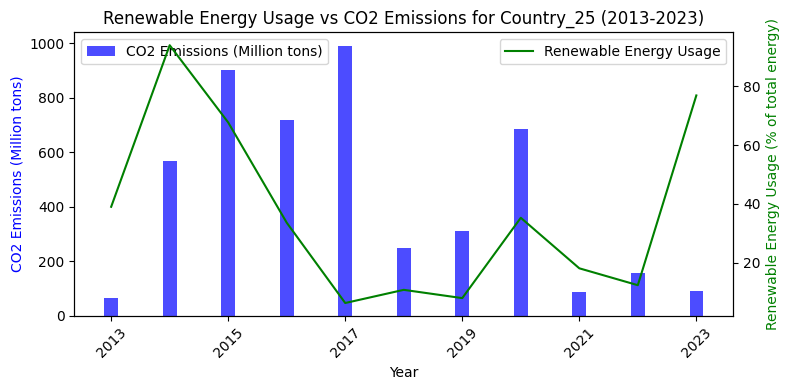

In [22]:
#Import Dependencies
import matplotlib.pyplot as plt

# Filter and sort the data
country_data = gw_df[gw_df['Country'] == 'Country_25']
last_10_years_data = country_data[country_data['Year'] >= 2013].sort_values(by='Year')

# Remove duplicate years, keeping the first entry
last_10_years_data = last_10_years_data.drop_duplicates(subset='Year', keep='first')

# Set the positions of the bars and prepare the plot
bar_width = 0.35  # Good balance for bar width
index = np.arange(len(last_10_years_data['Year'])) * 1.5  # Adjust index multiplier to space out the bars

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(8, 4))  # Adjust figure size for better visualization

# Bar plot for CO2 Emissions
ax1.bar(index, last_10_years_data['CO2_Emissions']/1e6, bar_width, label='CO2 Emissions (Million tons)', color='b', alpha=0.7)

# Create the twin axis for the line plot
ax2 = ax1.twinx()
ax2.plot(index, last_10_years_data['Renewable_Energy_Usage'], 'g-', label='Renewable Energy Usage')

# Labeling and aesthetics
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 Emissions (Million tons)', color='b')
ax2.set_ylabel('Renewable Energy Usage (% of total energy)', color='g')
ax1.set_title('Renewable Energy Usage vs CO2 Emissions for Country_25 (2013-2023)')

# Adjust tick parameters: Display every other year
tick_positions = index[::2]  # Take every second element for ticks
tick_labels = last_10_years_data['Year'].iloc[::2]  # Corresponding labels
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(tick_labels, rotation=45)  # Rotate labels for better fit

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()  # Optimize layout to prevent clipping of tick-labels
plt.show()

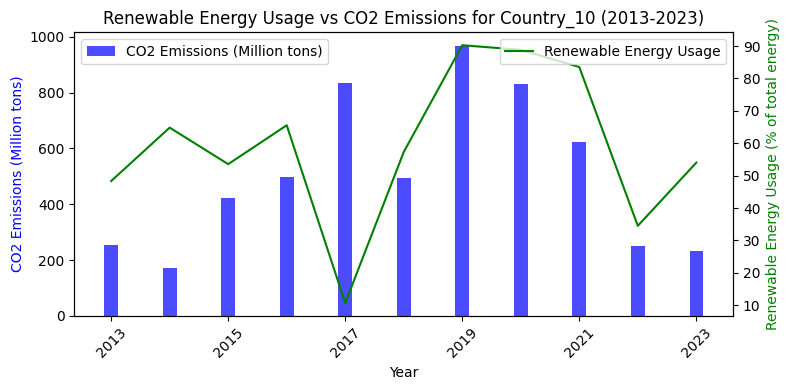

In [21]:
# Filter and sort the data for Country_10
country_data = gw_df[gw_df['Country'] == 'Country_10']
last_10_years_data = country_data[country_data['Year'] >= 2013].sort_values(by='Year')

# Remove duplicate years, keeping the first entry
last_10_years_data = last_10_years_data.drop_duplicates(subset='Year', keep='first')

# Set the positions of the bars and prepare the plot
bar_width = 0.35  # Good balance for bar width
index = np.arange(len(last_10_years_data['Year'])) * 1.5  # Adjust index multiplier to space out the bars

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(8, 4))  # Adjust figure size for better visualization

# Bar plot for CO2 Emissions
ax1.bar(index, last_10_years_data['CO2_Emissions']/1e6, bar_width, label='CO2 Emissions (Million tons)', color='b', alpha=0.7)

# Create the twin axis for the line plot
ax2 = ax1.twinx()
ax2.plot(index, last_10_years_data['Renewable_Energy_Usage'], 'g-', label='Renewable Energy Usage')

# Labeling and aesthetics
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 Emissions (Million tons)', color='b')
ax2.set_ylabel('Renewable Energy Usage (% of total energy)', color='g')
ax1.set_title('Renewable Energy Usage vs CO2 Emissions for Country_10 (2013-2023)')

# Adjust tick parameters: Display every other year
tick_positions = index[::2]  # Take every second element for ticks
tick_labels = last_10_years_data['Year'].iloc[::2]  # Corresponding labels
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(tick_labels, rotation=45)  # Rotate labels for better fit

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()  # Optimize layout to prevent clipping of tick-labels
plt.show()

Q5: Which factors contribute the most to predicting sea-level rise?

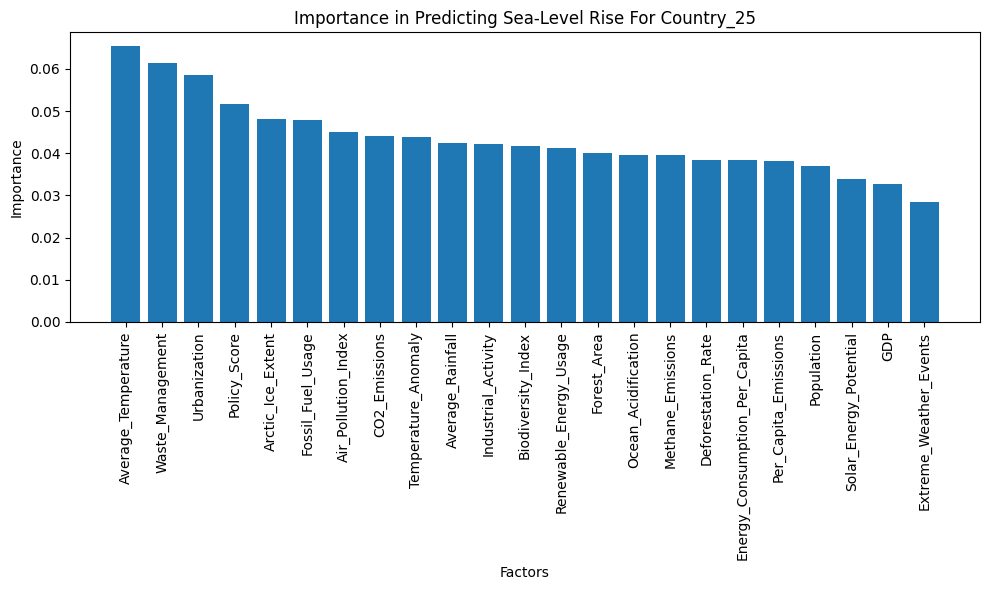

In [20]:
#Import dependencies
from sklearn.ensemble import RandomForestRegressor
# Filter data for Country_25
country_data = gw_df[gw_df['Country'] == 'Country_25']

# Drop non-numeric and non-relevant columns
X = country_data.drop(['Country', 'Year', 'Sea_Level_Rise'], axis=1)
y = country_data['Sea_Level_Rise']

# Handle missing values if necessary
X.fillna(X.mean(), inplace=True)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Importance in Predicting Sea-Level Rise For Country_25')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel('Factors')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

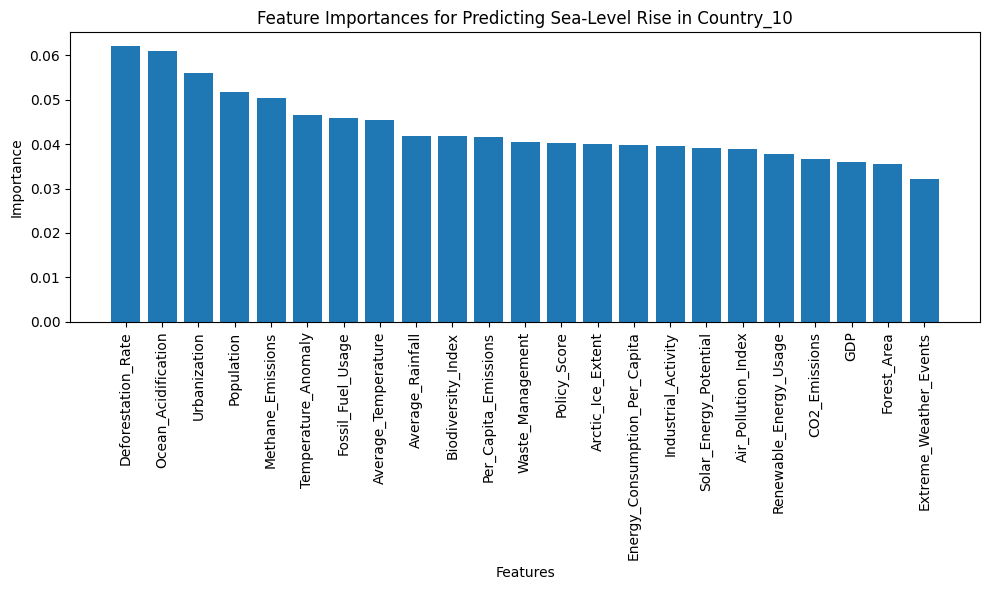

In [24]:
# Filter data for Country_10
country_data = gw_df[gw_df['Country'] == 'Country_10']

# Drop non-numeric and non-relevant columns
X = country_data.drop(['Country', 'Year', 'Sea_Level_Rise'], axis=1)
y = country_data['Sea_Level_Rise']

# Handle missing values if necessary
X.fillna(X.mean(), inplace=True)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances for Predicting Sea-Level Rise in Country_10')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

Q6: Can clustering techniques identify groups of countries with similar environmental policies?

In [ ]:
#Import dependency
from sklearn.cluster import KMeans

# Select relevant policy indicators
features = ['Policy_Score', 'Renewable_Energy_Usage']
X = gw_df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
gw_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Create a scatter plot
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i in range(3):  # Loop through clusters
    cluster_data = gw_df[gw_df['Cluster'] == i]
    plt.scatter(cluster_data['Policy_Score'], cluster_data['Renewable_Energy_Usage'], color=colors[i], label=f'Cluster {i+1}')

plt.title('Countries Based on Environmental Policies')
plt.xlabel('Policy Score')
plt.ylabel('Renewable Energy Usage (%)')
plt.legend()
plt.show()

NameError: name 'gw_df' is not defined